In [3]:
library(arules)

data <- read.transactions("news_title_batteryfilter.csv",
                           rm.duplicates = FALSE, 
                           format = "basket",  ##if you use "single" also use cols=c(1,2)
                           sep=",",  ## csv file
                           cols=1)
data

Loading required package: Matrix




Attaching package: 'arules'


The following objects are masked from 'package:base':

    abbreviate, write


Warning message in asMethod(object):
"removing duplicated items in transactions"


transactions in sparse format with
 282 transactions (rows) and
 139 items (columns)

In [4]:
data <- data[1:50, ]

In [5]:
inspect(data)

     items              transactionID
[1]  {battery,                       
      double,                        
      iphone,                        
      lifespan,                      
      promised,                      
      say}                    apple  
[2]  {battery,                       
      drone,                         
      fire,                          
      pixy,                          
      recalling}              snap   
[3]  {accessory,                     
      battery,                       
      charging,                      
      pack,                          
      percent}                anker  
[4]  {battery,                       
      come,                          
      doorbell,                      
      feature,                       
      latest,                        
      look,                          
      new,                           
      old}                    ring   
[5]  {apple,                         
      batter

In [15]:
rules <- apriori(data=data,parameter = list(supp=.001, conf=.01, minlen=2),
                     appearance = list(default="lhs", rhs="battery"),
                     control=list(verbose=FALSE))
# BeerRules <- sort(BeerRules, decreasing=TRUE, by="confidence")
inspect(rules)                                               

       lhs                   rhs       support confidence coverage      lift count
[1]    {quest}            => {battery}    0.08  1.0000000     0.08 1.0869565     4
[2]    {meta}             => {battery}    0.08  1.0000000     0.08 1.0869565     4
[3]    {watch}            => {battery}    0.08  1.0000000     0.08 1.0869565     4
[4]    {revealed}         => {battery}    0.08  1.0000000     0.08 1.0869565     4
[5]    {hour}             => {battery}    0.08  1.0000000     0.08 1.0869565     4
[6]    {bigger}           => {battery}    0.08  1.0000000     0.08 1.0869565     4
[7]    {predecessor}      => {battery}    0.08  1.0000000     0.08 1.0869565     4
[8]    {likely}           => {battery}    0.08  1.0000000     0.08 1.0869565     4
[9]    {pixel}            => {battery}    0.08  1.0000000     0.08 1.0869565     4
[10]   {could}            => {battery}    0.08  1.0000000     0.08 1.0869565     4
[11]   {drone}            => {battery}    0.10  1.0000000     0.10 1.0869565     5
[12]

In [16]:
conf_rules <- sort(rules, decreasing=TRUE, by="confidence")
inspect(rules[1:10])     

     lhs              rhs       support confidence coverage lift     count
[1]  {quest}       => {battery} 0.08    1          0.08     1.086957 4    
[2]  {meta}        => {battery} 0.08    1          0.08     1.086957 4    
[3]  {watch}       => {battery} 0.08    1          0.08     1.086957 4    
[4]  {revealed}    => {battery} 0.08    1          0.08     1.086957 4    
[5]  {hour}        => {battery} 0.08    1          0.08     1.086957 4    
[6]  {bigger}      => {battery} 0.08    1          0.08     1.086957 4    
[7]  {predecessor} => {battery} 0.08    1          0.08     1.086957 4    
[8]  {likely}      => {battery} 0.08    1          0.08     1.086957 4    
[9]  {pixel}       => {battery} 0.08    1          0.08     1.086957 4    
[10] {could}       => {battery} 0.08    1          0.08     1.086957 4    


In [17]:
lift_rules <- sort(rules, decreasing=TRUE, by="lift")
inspect(rules[1:10])     

     lhs              rhs       support confidence coverage lift     count
[1]  {quest}       => {battery} 0.08    1          0.08     1.086957 4    
[2]  {meta}        => {battery} 0.08    1          0.08     1.086957 4    
[3]  {watch}       => {battery} 0.08    1          0.08     1.086957 4    
[4]  {revealed}    => {battery} 0.08    1          0.08     1.086957 4    
[5]  {hour}        => {battery} 0.08    1          0.08     1.086957 4    
[6]  {bigger}      => {battery} 0.08    1          0.08     1.086957 4    
[7]  {predecessor} => {battery} 0.08    1          0.08     1.086957 4    
[8]  {likely}      => {battery} 0.08    1          0.08     1.086957 4    
[9]  {pixel}       => {battery} 0.08    1          0.08     1.086957 4    
[10] {could}       => {battery} 0.08    1          0.08     1.086957 4    


In [18]:
supp_rules <- sort(rules, decreasing=TRUE, by="support")
inspect(rules[1:10])     

     lhs              rhs       support confidence coverage lift     count
[1]  {quest}       => {battery} 0.08    1          0.08     1.086957 4    
[2]  {meta}        => {battery} 0.08    1          0.08     1.086957 4    
[3]  {watch}       => {battery} 0.08    1          0.08     1.086957 4    
[4]  {revealed}    => {battery} 0.08    1          0.08     1.086957 4    
[5]  {hour}        => {battery} 0.08    1          0.08     1.086957 4    
[6]  {bigger}      => {battery} 0.08    1          0.08     1.086957 4    
[7]  {predecessor} => {battery} 0.08    1          0.08     1.086957 4    
[8]  {likely}      => {battery} 0.08    1          0.08     1.086957 4    
[9]  {pixel}       => {battery} 0.08    1          0.08     1.086957 4    
[10] {could}       => {battery} 0.08    1          0.08     1.086957 4    


In [ ]:
library(arulesViz)

subrules <- head(sort(rules, by="lift"),10)
plot(subrules)

# plot(subrules, method="graph", engine="interactive")
# plot(subrules, method="graph", engine="htmlwidget")

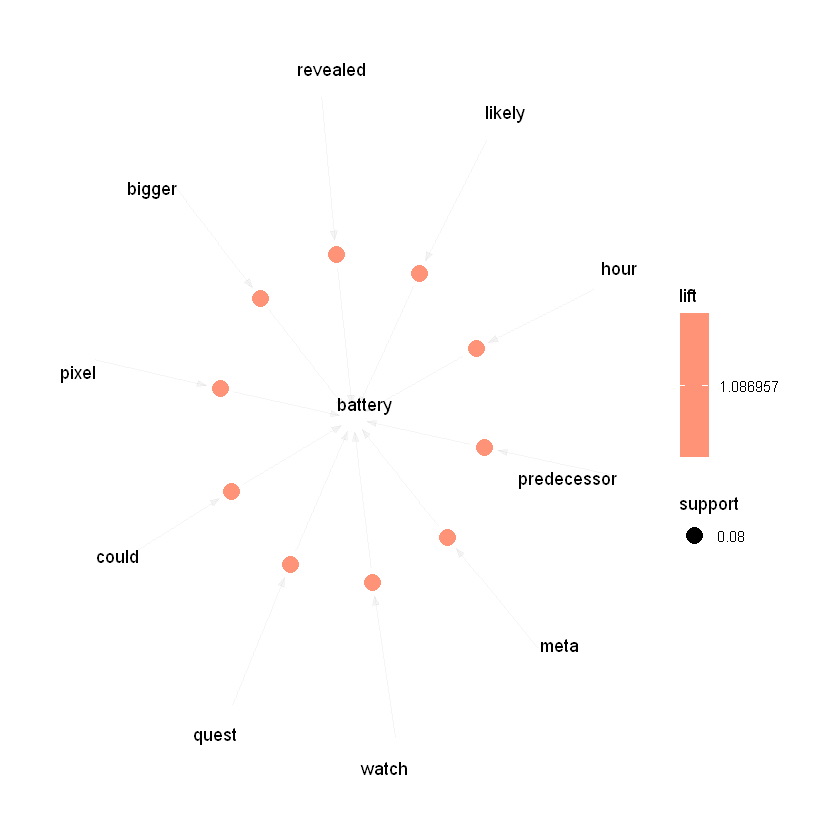

: 

In [22]:
plot(subrules, method="graph", )

In [12]:
rules <- apriori(data=data,parameter = list(supp=.001, conf=.01, minlen=2),
                     appearance = list(default="lhs", rhs="fire"),
                     control=list(verbose=FALSE))
# BeerRules <- sort(BeerRules, decreasing=TRUE, by="confidence")
inspect(rules)                                               

     lhs                                  rhs    support confidence coverage
[1]  {drone}                           => {fire} 0.1     1.0000000  0.10    
[2]  {pixy}                            => {fire} 0.1     1.0000000  0.10    
[3]  {recalling}                       => {fire} 0.1     1.0000000  0.10    
[4]  {battery}                         => {fire} 0.1     0.1086957  0.92    
[5]  {drone, pixy}                     => {fire} 0.1     1.0000000  0.10    
[6]  {drone, recalling}                => {fire} 0.1     1.0000000  0.10    
[7]  {battery, drone}                  => {fire} 0.1     1.0000000  0.10    
[8]  {pixy, recalling}                 => {fire} 0.1     1.0000000  0.10    
[9]  {battery, pixy}                   => {fire} 0.1     1.0000000  0.10    
[10] {battery, recalling}              => {fire} 0.1     1.0000000  0.10    
[11] {drone, pixy, recalling}          => {fire} 0.1     1.0000000  0.10    
[12] {battery, drone, pixy}            => {fire} 0.1     1.0000000  0.10    

In [13]:
rules <- apriori(data=data,parameter = list(supp=.001, conf=.01, minlen=2),
                     appearance = list(default="lhs", rhs="quest"),
                     control=list(verbose=FALSE))
# BeerRules <- sort(BeerRules, decreasing=TRUE, by="confidence")
inspect(rules)                                               

    lhs                      rhs     support confidence coverage lift     
[1] {meta}                => {quest} 0.08    1.00000000 0.08     12.500000
[2] {pack}                => {quest} 0.08    0.44444444 0.18      5.555556
[3] {battery}             => {quest} 0.08    0.08695652 0.92      1.086957
[4] {meta, pack}          => {quest} 0.08    1.00000000 0.08     12.500000
[5] {battery, meta}       => {quest} 0.08    1.00000000 0.08     12.500000
[6] {battery, pack}       => {quest} 0.08    0.44444444 0.18      5.555556
[7] {battery, meta, pack} => {quest} 0.08    1.00000000 0.08     12.500000
    count
[1] 4    
[2] 4    
[3] 4    
[4] 4    
[5] 4    
[6] 4    
[7] 4    


In [1]:
 Convert the data into a transaction format
transactions <- as(data, "transactions")

# Mine frequent itemsets
# frequent_itemsets <- eclat(transactions, parameter = list(support = 0.01))

# Generate association rules
rules <- apriori(transactions, parameter = list(support = 0.0001, confidence = 0.0005))

# Analyze the rules
inspect(rules)

data <- read.csv("cleaned_text.csv", header=FALSE)
data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
relatable,moment,nasa,struggled,three,month,get,lid,asteroid,sample,⋯,space,back,nasa,ive,struggled,jar,char,,,
may,good,time,buy,one,amazon,latest,tablet,many,sale,⋯,brings,fire,hd,char,,,,,,
porsche,officially,revealed,new,allelectric,macan,suv,giving,u,little,⋯,along,reveal,company,dropped,spec,pricing,information,approximate,r,char
apple,thgen,ipad,sale,via,amazon,part,bundle,includes,two,⋯,coverage,discount,brings,price,gb,model,char,,,
grass,ahead,lurks,cottonball,puff,creature,stubby,appendage,round,yellow,⋯,appropriately,named,lamball,one,many,island,creature,char,,
valentine,day,quickly,approaching,ancient,predecessor,lupercalia,dont,celebrate,holiday,⋯,street,there,reason,cant,obser,char,,,,
power,point,view,kia,vehicletoload,capability,mean,plug,household,appliance,⋯,ev,also,vehicletoho,char,,,,,,
ring,latest,battery,doorbell,come,new,feature,old,look,ring,⋯,come,new,feature,old,look,ring,battery,doorbell,pro,brings
radar,char,,,,,,,,,⋯,,,,,,,,,,


In [ ]:
library(arules)

In [ ]:
df <- read.transactions("cleaned_text.csv",
                           rm.duplicates = FALSE, 
                           format = "basket",  ##if you use "single" also use cols=c(1,2)
                           sep=",",  ## csv file
                           cols=1)
df

In [3]:
arules::apriori(df, parameter = list(support=0.0015,confidence=0.015, minlen=1,maxlen = 11))

: 